# ABSTRACT

## 1. Introducción

**Contexto comercial:** A lo largo de los años las situaciones delictivas han ido aumentando en toda la Argentina, en particular en las ciudades mas importantes y pobladas del país, en particular la Ciudad Autonoma de Buenos Aires, la cual se tomará como zona geografica de estudio. Concer el comportamineto de los mismos puede generar una fuerte ventaja para combatirlas por parte de las fuerzas policiales y por otro lado puede utilizarse como una ventaja competitiva para la industria y comercios que brinden bienes y servicios a la sociedad, por ejemplo: en que barrios colocar franquicias de empresas gastronomicas de gran importancia, a que hora recomandar a los clientes que asistan, en que franja horaria atender al publico o en que franja horaria recibir a los proveedores, entre otros. 

**Probelma comercial:** Buscando responder el ¿Qué pasó con el delito en Buenos Aires?
Buscamos comprender el comportamiento de la criminalidad en la región estudiada (CABA) partiendo de la hipótesis que a incrementado la tasa de delitos a lo largo del tiempo. Además, se puede hacer un análisis del tipo geográfico, tomando en cuenta las variables de zonas y barrios más peligrosos.

**Objetivo:** El objetivo es realizar diferentes tipos de análisis cruzando variables que nos permitan obtener información de forma clara y detallada sobre el comportamien delictivo antes, durante y en la post pandemia, como asi tambien el desarrollo geofrafíco del mismo; para poder tener conocimiento y anticipar este tipo de situaciones.


**Contexto analítico:** El Gobierno de la Ciudad de Buenos Aires implemento desde enero de 2016 hasta diciembre de 2021 un registro de los delitos que suceden en CABA. Gracias a estos registros mencionados, se pudo generar una base de datos que permite, con facilidad, la lectura de las zonas más afectadas.

El Data Set se obtuvo de la pagina del Gobierno de CABA, de tipo excell que contiene detalles sobre cada delito, como fecha, franja horaria, ubicación del accidente, tipo de delito, si hubo armas involucradas, tiempo de respuesta, victimas, etc. 

El Listado de Tablas:
- *Tabla Delito:*  Es una tabla que contiene el número identificador del delito cometido, el id del oficial que interviene en el delito, y en el caso de que se haya realizado un arresto en la misma se encuentra el número identificador del arresto.Además, encontramos en la misma el tiempo de respuesta (cuánto se tardó en llegar al lugar de donde se solicitó presencia policial. Está la fecha de la actuación, la franja horaria de la misma. Datos geográficos como longitud, latitud, barrio y comuna.También hay datos de descripción propios de delito como ser tipo, sub delito, usó armas (refiere a identificar si se usaron armas en el procedimiento). Arresto, para identificar si hubo detenidos, y víctimas en el caso de que una persona haya perdido la vida.Arresto (binario cual identifica con un “SI” en caso de haya habido un arresto, caso contrario se identifica con “NO”). Víctimas (proporciona información de la cantidad de víctimas en un delito).
- *Tabla arresto:* En este caso la información que contiene es el identificador del arresto e indica si hubo intervención de un canino en la misma.
- *Tabla Canino:* Contiene una breve descripción del animal que interviene en un procedimiento en caso de ser necesario. Raza, edad del animal y medallas en caso de que cuente con alguna distinción por su trayectoria en la fuerza.
- *Tabla Detenido:* En el caso de haber alguna persona detenida durante el procedimiento, esta tabla muestra su información personal y si tiene antecedentes penales o no.
- *Tabla Oficial:* Esta tabla cumple la función de proporcionar la información personal de los efectivos que intervienen en cada actuación y su rango dentro de la fuerza. Todos tienen un número de identificación, y se detalla a qué comisaría pertenecen
- *Tabla Comisaría:* Aquí se brinda información de cada seccional, dirección, comuna, nombre, teléfono, observaciones, barrio, código postal. 

### Importación de librerías

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
mpl.style.use('bmh')
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions

### Importación de datos

In [7]:
df_delitos = pd.read_excel('bd_delitosDefinitiva.xlsx')
df_oficial = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Oficial' )
df_comisaria = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Comisaria' )
df_detenido = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Detenido' )
df_canino = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Canino' )
df_arresto = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Arresto' )

## 2.EDA: Exploratory Data Analysis

In [8]:
df_delitos.head()

id_delito      fecha franja_horaria                   tipo  \
0  DEL1000086952 2016-01-01             13   Robo (con violencia)   
1  DEL1000086953 2016-01-01             22   Robo (con violencia)   
2  DEL1000086954 2016-01-01              1               Lesiones   
3  DEL1000086955 2016-01-01             19  Hurto (sin violencia)   
4  DEL1000086956 2016-01-01              4   Robo (con violencia)   

          subtipo uso_armas  t_respuesta arresto Id_arresto  Id_oficial  \
0             NaN       NaN           84      no        NaN     1100114   
1             NaN       NaN          135      no        NaN     1100305   
2  Siniestro Vial       NaN          143      no        NaN     1100089   
3             NaN       NaN           29      no        NaN     1100058   
4  Robo Automotor       NaN          163      no        NaN     1100546   

              barrio  comuna    latitud   longitud  victimas  
0  Parque Avellaneda     9.0 -34.648730 -58.468536       NaN  
1            Palermo    14.0 -34.576925 -58.407400       NaN  
2   Parque Patricios     4.0 -34.645197 -58.401099       NaN  
3  Parque Avellaneda     9.0 -34.655760 -58.478681       NaN  
4          Caballito     6.0 -34.624128 -58.436826       NaN

In [9]:
df_oficial.head()

Id_oficial                       Nombre       DNI               RANGO?  \
0     1100001              Almendra Muriel  20452504      Comisario mayor   
1     1100002                  Gian Xavier  30302763            Comisario   
2     1100003  Federico Giovanni Alejandro  24076249  Comisario inspector   
3     1100004              Maitte Agustina  35687002            Inspector   
4     1100005               Lisandro Simon  24006261            Inspector   

  estado_civil       Calle_ofi  nro_calle_ofi        Ciudad_ofi Provincia_ofi  \
0       CASADO     GDOR DAVILA          14376             Boedo          CABA   
1      SOLTERO  HEROES DEL SUR          11696  Presidente Peron           GBA   
2       CASADO      M CAMBEIRA           3308        Villa Real          CABA   
3      SOLTERO       CALLE S N           4404             Tigre           GBA   
4       CASADO       CALLE S N          14979     Villa Urquiza          CABA   

       Id_delito  Id_comisaria  
0  DEL1000087400            53  
1  DEL1000086964            32  
2  DEL1000088427            50  
3  DEL1000087047             8  
4  DEL1000088469            51

In [10]:
df_comisaria.head()

Id_comisaria                        nombre_comisaria calle_comisaria  \
0             1                   Comisaria Vecinal 1-D         Lavalle   
1             2  Comisaria Vecinal 1-B (edificio anexo)            Peru   
2             3                   Comisaria Vecinal 1-A         Tucuman   
3             4                   Comisaria Vecinal 1-B         Tacuari   
4             5                     Comisaria Comunal 3         Lavalle   

   altura_comisaria                       telefonos observaciones  \
0               451                  4322-8033/8221           NaN   
1              1056        4307-0537/4361 -8054 /66           NaN   
2              1560  4371-3333 /4373-6194/4374-0454           NaN   
3               770            4331-9643 /4342-3333           NaN   
4              1958                  4953-2273/3323           NaN   

  barrio_comisaria  comuna_comisaria codigo postal  
0      SAN NICOLAS                 1      C1047AAI  
1        SAN TELMO                 1      C1068AAL  
2      SAN NICOLAS                 1      C1050AAF  
3        MONSERRAT                 1      C1071AAP  
4        BALVANERA                 3      C1051ABD

In [11]:
df_detenido.head()

Id_detenido          nombre_detenido  DNI_detenido  q_antecedentes  \
0    D1000001        Antonella Celeste      40041469               0   
1    D1000002             Saida Jazmin      36159618               2   
2    D1000003             Karime Gisel      39633448               5   
3    D1000004           Santiago Ruben      37814145               5   
4    D1000005  Nahuel Benjamin Esteban      44484550               0   

  estado_civil_detenido nacionalidad_detenido       domicilio_calle_detenido  \
0                CASADO             Paraguaya                  LOS JILGUEROS   
1                CASADO            Venezolana               GRITO DE ASENCIO   
2                CASADO              Uruguaya  PAULA ALBARRACIN DE SARMIENTO   
3                CASADO            Venezolana              RICARDO GUIRALDES   
4                CASADO             Boliviana                        MOSCONI   

   altura_detenido   ciudad_detenido provincia_detenido  
0             2352          Barracas               CABA  
1             8923   Vélez Sársfield               CABA  
2            14754   Velez Sarsfield               CABA  
3             8040            Moreno                GBA  
4            12162  Villa Santa Rita               CABA

In [12]:
df_canino.head()

Id_canino                Raza  Edad  Medallas
0   C110001       Pastor aleman     6        33
1   C110002  Labrador Retriever    10        10
2   C110003        Pastor Belga     6         8
3   C110004       Pastor aleman     7        10
4   C110005        Pastor Belga    10         1

In [13]:
df_arresto.head()

Id_arresto           Tipo_arresto Subtipo_arresto Canino? Id_canino  \
0  ARR0000001     Prision Preventiva     No violento      NO       NaN   
1  ARR0000002               Detenido     No violento      NO       NaN   
2  ARR0000003  Privación de libertad        Violento      NO       NaN   
3  ARR0000004  Privación de libertad        Violento      NO       NaN   
4  ARR0000005            Aprehendido        Violento      NO       NaN   

       Id_delito Id_detenido  
0  DEL1000115314    D1000519  
1  DEL1000115315    D1000551  
2  DEL1000115316    D1000069  
3  DEL1000115318    D1001367  
4  DEL1000115319    D1000998

### Tipo de datos

In [22]:
df_delitos.dtypes

id_delito                 object
fecha             datetime64[ns]
franja_horaria             int64
tipo                      object
subtipo                   object
uso_armas                 object
t_respuesta                int64
arresto                   object
Id_arresto                object
Id_oficial                object
barrio                    object
comuna                    object
latitud                   object
longitud                  object
victimas                 float64
dtype: object

In [15]:
df_delitos['franja_horaria']=df_delitos.franja_horaria.replace({'S/D':'30', 'SD':'30','sd':'30'})
for var in ['franja_horaria']:
  df_delitos[var] = df_delitos[var].astype('int64')
for var in ['Id_oficial','comuna','latitud','longitud']:
    df_delitos[var] = df_delitos[var].astype('object')

In [23]:
df_oficial.dtypes

Id_oficial       object
Nombre           object
DNI               int64
RANGO?           object
estado_civil     object
Calle_ofi        object
nro_calle_ofi     int64
Ciudad_ofi       object
Provincia_ofi    object
Id_delito        object
Id_comisaria      int64
dtype: object

In [17]:
for var in ['Id_oficial']:
    df_oficial[var] = df_oficial[var].astype('object')

In [18]:
df_comisaria.dtypes

Id_comisaria         int64
nombre_comisaria    object
calle_comisaria     object
altura_comisaria     int64
telefonos           object
observaciones       object
barrio_comisaria    object
comuna_comisaria     int64
codigo postal       object
dtype: object

In [19]:
df_detenido.dtypes

Id_detenido                 object
nombre_detenido             object
DNI_detenido                 int64
q_antecedentes               int64
estado_civil_detenido       object
nacionalidad_detenido       object
domicilio_calle_detenido    object
altura_detenido              int64
ciudad_detenido             object
provincia_detenido          object
dtype: object

In [20]:
df_canino.dtypes

Id_canino    object
Raza         object
Edad          int64
Medallas      int64
dtype: object

In [21]:
df_arresto.dtypes

Id_arresto         object
Tipo_arresto       object
Subtipo_arresto    object
Canino?            object
Id_canino          object
Id_delito          object
Id_detenido        object
dtype: object

### Estadística Descriptiva Básica

In [24]:
df_delitos.describe()

franja_horaria    t_respuesta     victimas
count   648656.000000  648656.000000  3848.000000
mean        13.585401     101.017438     1.141112
std          6.479477      45.904501     0.538697
min          0.000000      22.000000     1.000000
25%          9.000000      61.000000     1.000000
50%         14.000000     101.000000     1.000000
75%         19.000000     141.000000     1.000000
max         30.000000     180.000000    10.000000

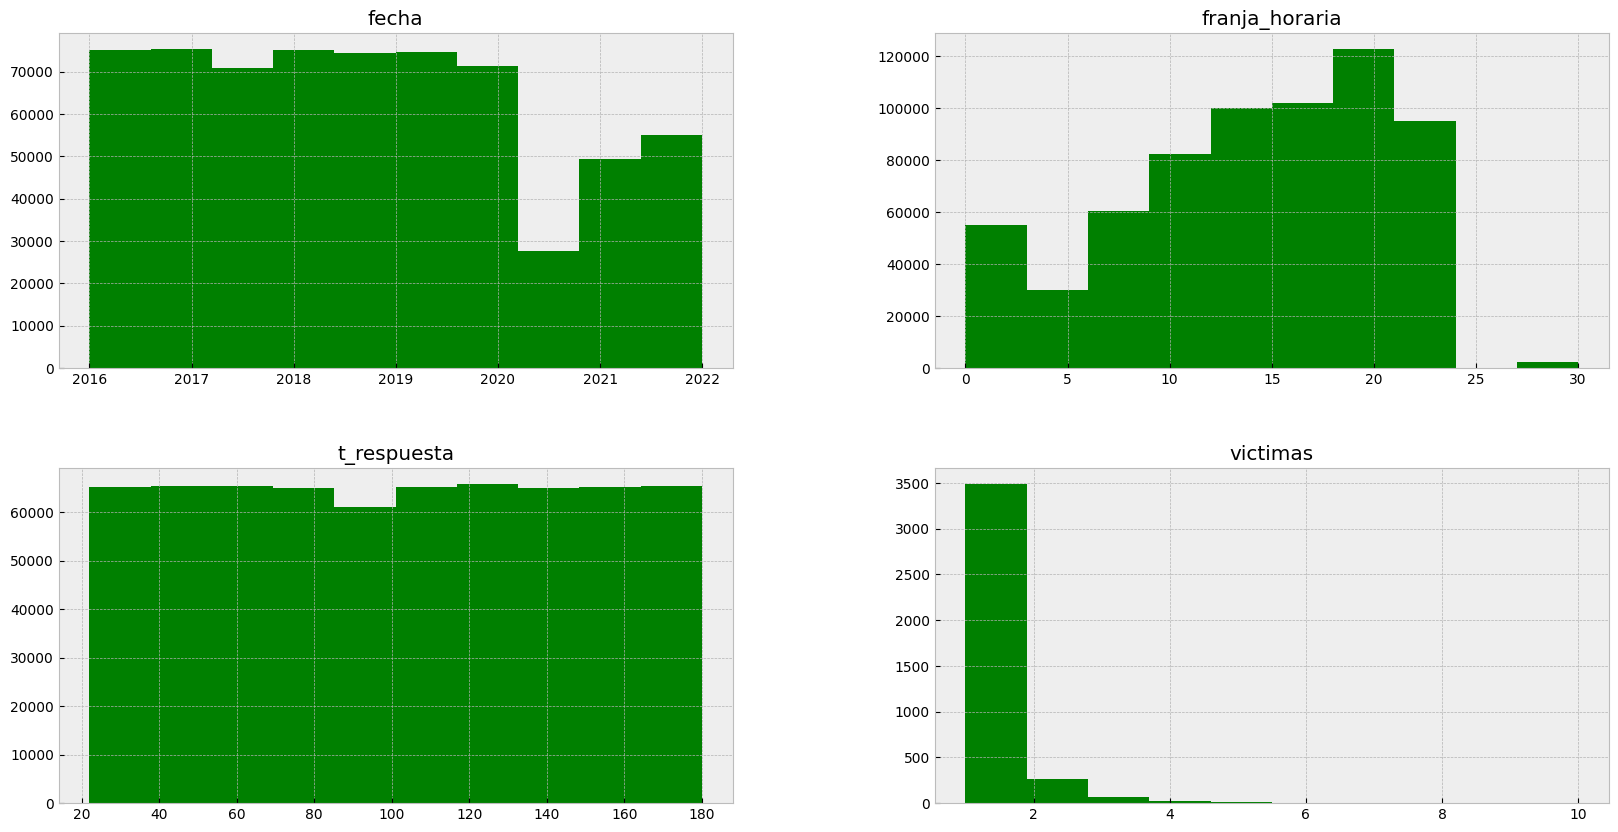

In [25]:
hists = df_delitos.hist(figsize=(20,10), color = 'green')

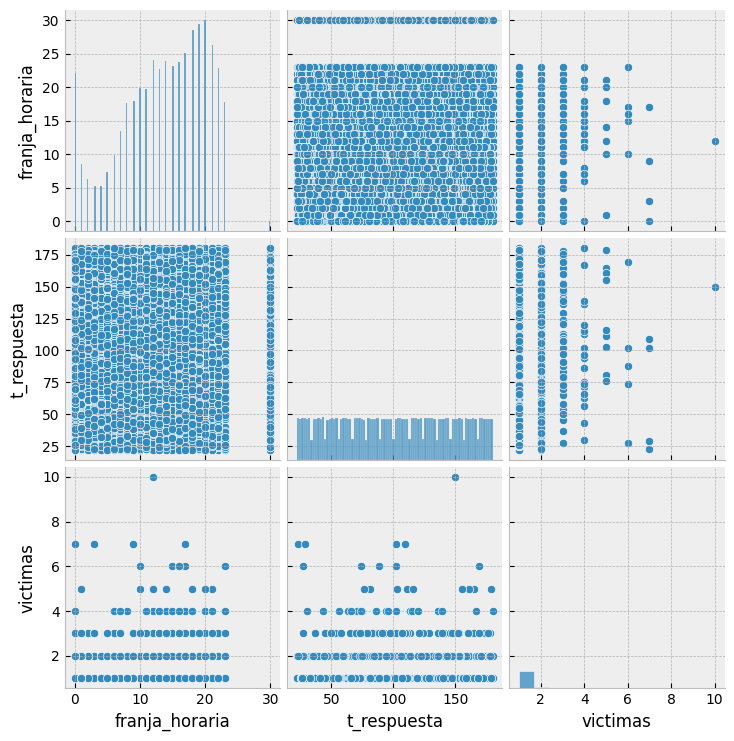

In [26]:
graf=df_delitos[['franja_horaria','tipo','uso_armas','t_respuesta','arresto','barrio','victimas']]
sns.pairplot(graf)

### Identificación de valores atípicos

<AxesSubplot:>

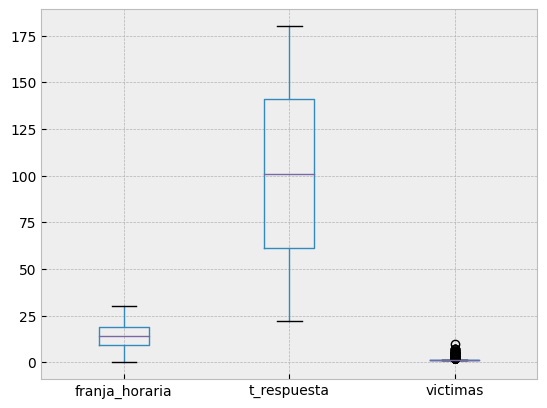

In [27]:
    plt.figure()
    df_delitos.boxplot(['franja_horaria','t_respuesta','victimas'])

Tanto en el boxplot, como en los histogramas visualizados anteriormente, se denota el valor 30 en franja horaria, lo cual no corresponde a valores reales, por lo tanto se eliminaran todos los datos que contengan este valor.
Por otro lado se puede notar la presencia de lo que se podría considerar un valor atípico en el numero de victimas, siendo de 10, pero consideramos de que el mismo puede tratarse de un delito de gran severidad

### Contar Valores Faltantes

In [28]:
df_delitos.isna().sum()

id_delito              0
fecha                  0
franja_horaria         0
tipo                   0
subtipo           554915
uso_armas         632903
t_respuesta            0
arresto                0
Id_arresto        388475
Id_oficial             0
barrio             10047
comuna              1763
latitud            10078
longitud           10052
victimas          644808
dtype: int64

In [29]:
df_oficial.isna().sum()

Id_oficial       0
Nombre           0
DNI              0
RANGO?           0
estado_civil     0
Calle_ofi        0
nro_calle_ofi    0
Ciudad_ofi       0
Provincia_ofi    0
Id_delito        0
Id_comisaria     0
dtype: int64

In [30]:
df_comisaria.isna().sum()


Id_comisaria         0
nombre_comisaria     0
calle_comisaria      0
altura_comisaria     0
telefonos            2
observaciones       44
barrio_comisaria     0
comuna_comisaria     0
codigo postal        3
dtype: int64

In [31]:
df_detenido.isna().sum()

Id_detenido                 0
nombre_detenido             0
DNI_detenido                0
q_antecedentes              0
estado_civil_detenido       0
nacionalidad_detenido       0
domicilio_calle_detenido    0
altura_detenido             0
ciudad_detenido             0
provincia_detenido          0
dtype: int64

In [32]:
df_canino.isna().sum()

Id_canino    0
Raza         0
Edad         0
Medallas     0
dtype: int64

In [33]:
df_arresto.isna().sum()

Id_arresto              0
Tipo_arresto            0
Subtipo_arresto         0
Canino?                 0
Id_canino          140534
Id_delito               0
Id_detenido             0
dtype: int64

### Análisis Relacional

### Relaciones matemáticas

In [34]:
df_delitos.corr(method = 'spearman')

franja_horaria  t_respuesta  victimas
franja_horaria        1.000000    -0.000076 -0.027948
t_respuesta          -0.000076     1.000000  0.001740
victimas             -0.027948     0.001740  1.000000

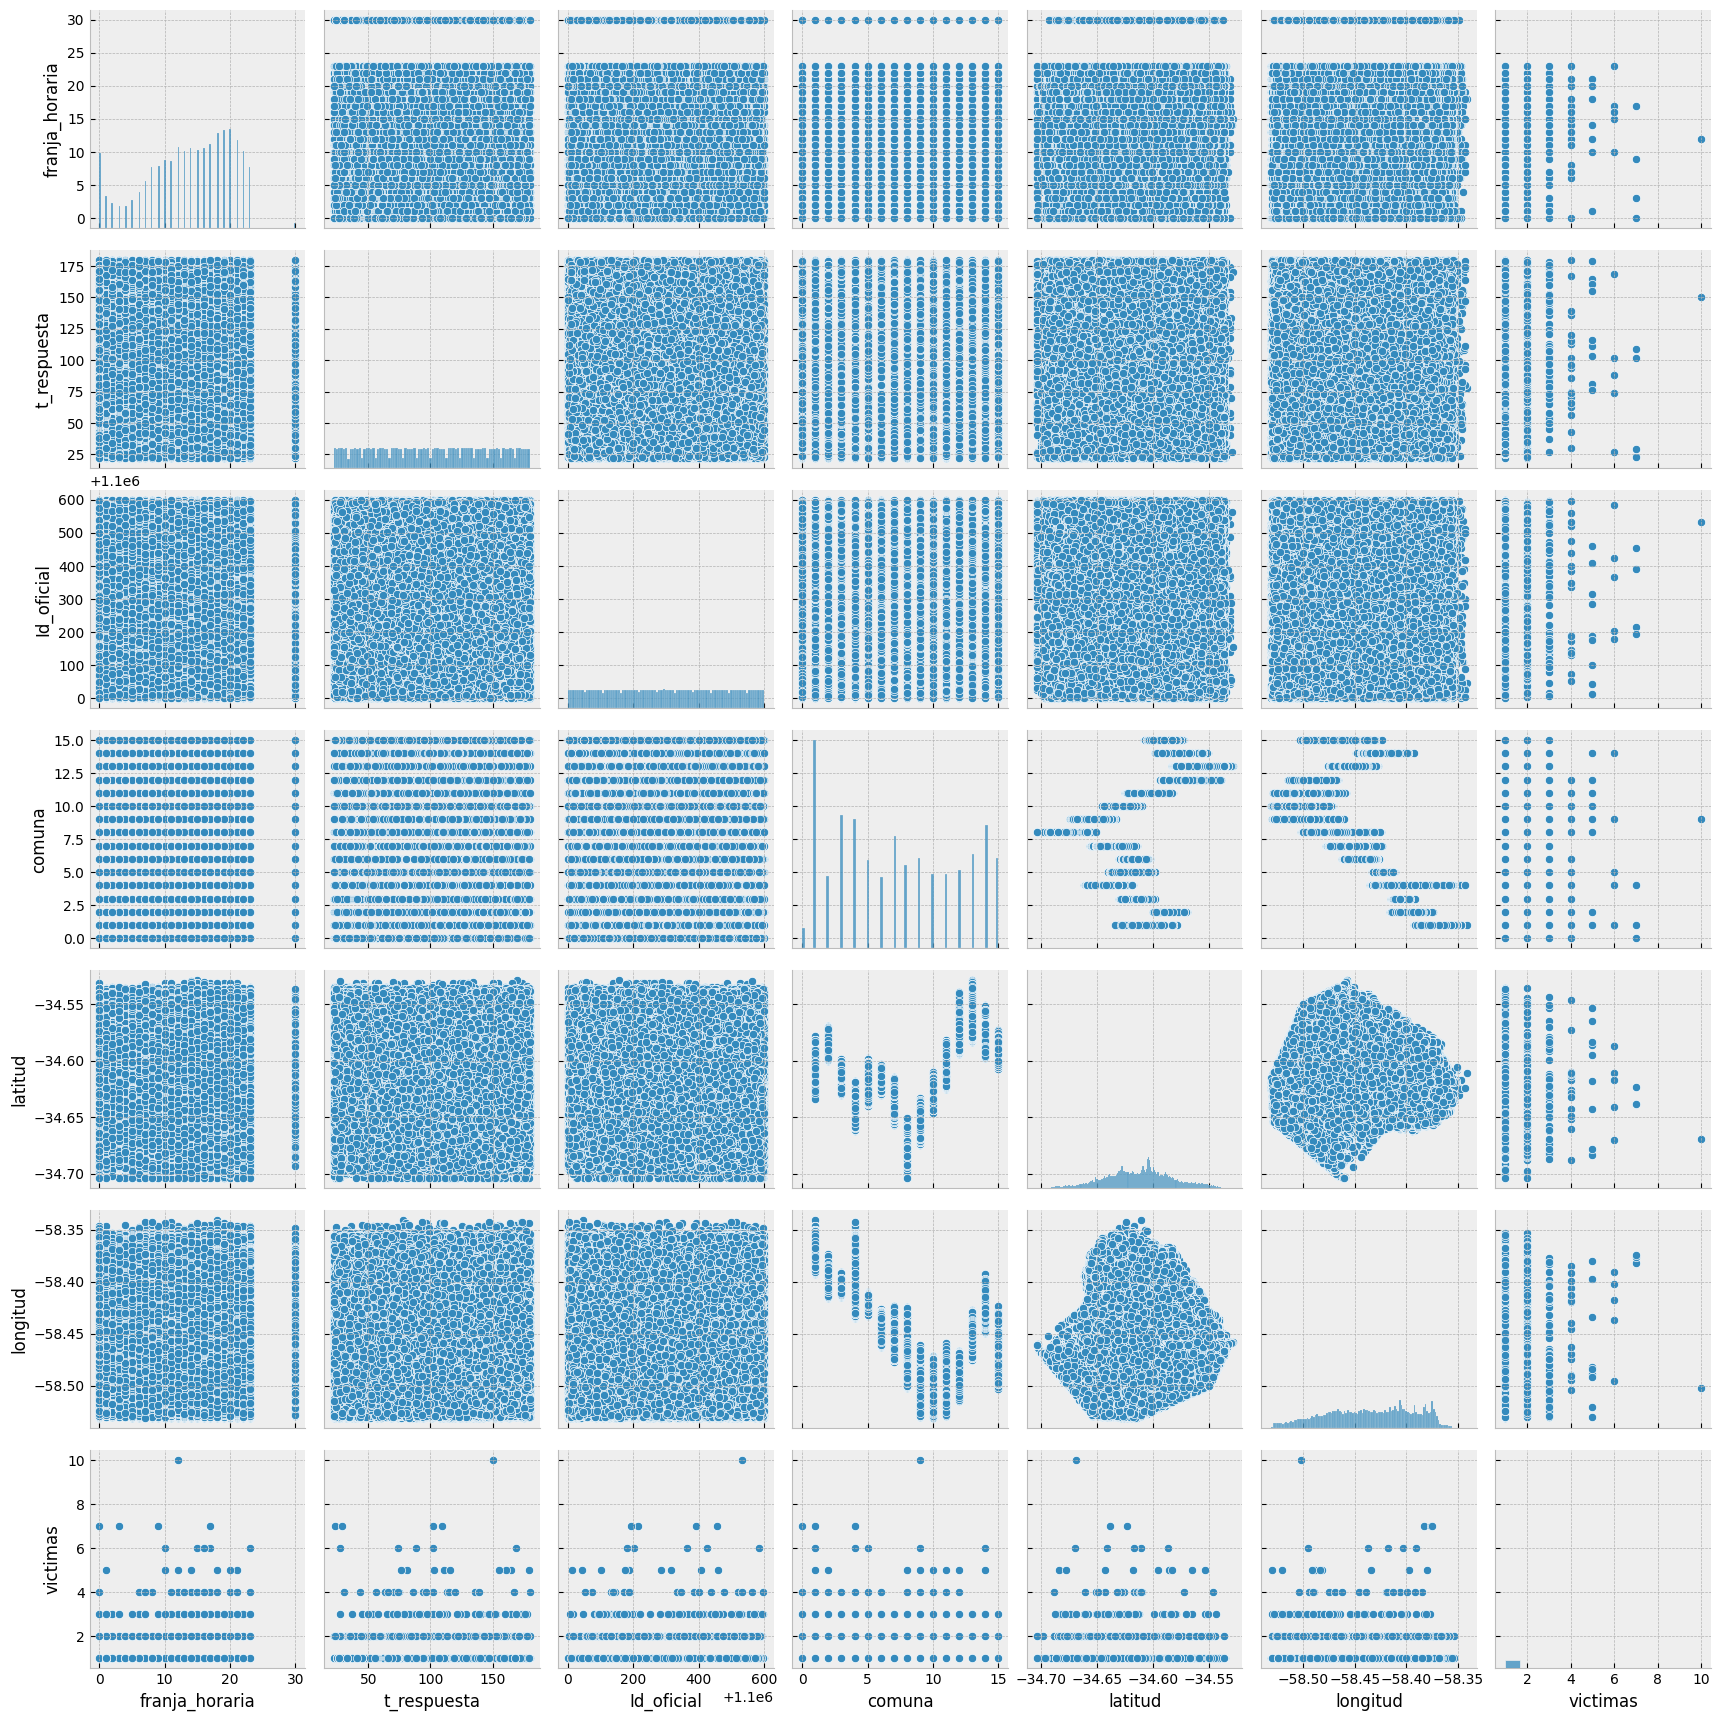

In [35]:
sns.pairplot(df_delitos)

### Cortar atípicos al rango de outliers

In [43]:
for var in ['franja_horaria']:
    lim_sup = 23
    lim_inf =0
    df_delitos[var].clip(lim_inf, lim_sup, inplace=True)

### Imputación de valores nulos (variables numéricas)

In [44]:
df_delitos['victimas'].fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
648651    0.0
648652    0.0
648653    0.0
648654    0.0
648655    0.0
Name: victimas, Length: 648656, dtype: float64

### Preguntas/Hipótesis que queremos resolver mediante el análisis de datos

Sobre la variable tiempo de respuesta. Nos preguntamos:
- El promedio de tiempo de respuesta
- El máximo tiempo respuesta (La demora maxima)
- El mínimo tiempo de respuesta
- En cuantas se tardo mas de 1 hr. en responder y en cuantas menos
Planteamos la siguiente prueba de hipotesis
- La distribución de la variable x:tiempo de respuesta es uniforme. H0: la distribución es uniforme Ha: la distribución no es uniforme
            
Sobre la variable barrios nos preguntamos
- Barrio con mayor delitos
- Barrio con menor delitos
- Promedio de delitos entre todos los barrios
- Que cantidad de barrios se ubican por debajo del promedio      


Sobre la variable modalidad de delito. Nos preguntamos
- Mayor modalidad de robo
- Menor modalidad de robo

Sobre la variable fechas de los delitos. Nos preguntamos:
- En que fecha sucedieron mas delitos
- En que fecha sucediren menos delitos
- Promedio de delitos por día
- Promedio de delitos por año
- Año con más delitos En busqueda de poder propiciar un pronostico, son de interes las siguientes pruebas de hipotesis Para que el proceso sea estacionario es necesario que la media y varianza sean constantes
- La media de los valores es menor que infinito. H0-μ<∞ Ha-μ=∞
- El desvio estandar de los valores es menor a infinito. H0-σ²<∞ Ha-σ²=∞

Para analizar si el ruido de la variable anterior es blanco y poder pronosticar se debe cumplir las siguientes hipotesis (siendo el error ε-sub-t)
- La distribución de los errores es normal. H0-E(ε-sub-t)=0 Ha-E(ε-sub-t)≠0
- La autocorrelación es nula. H0-ρ-sub-t=0 Ha-ρ-sub-t≠0
- La varianza de los errores es constante. H0-S<∞ Ha-S=∞

Sobre la variable id de policia. Nos preguntamos:
- Que policia participo en más delitos
- Que policia participo en menos delitos
- Cantidad promedio de participación en delitos
- Cantidad que participa en más de 1000 delitos


Sobre la variable franja horaria, nos preguntamos:
- Cual es la franja horaria con mayor delitos cometidos
- Cual es la franja horario con menor delitos cometidos
- Mayormente los delitos se cometen en horarios diurnos o nocturnos


Es interesante realizar la siguiente pruebas de hipotesis
- La dsitribución de la variable x:delitos por franja horaria es normal. H0- x se distribuye de forma normal Ha-x no se distribuye de forma normal

### Visualización
Para previsualizar el comportamineto de algunas de las variables se realizaran a continuacion una serie de gráficos

Text(0, 0.5, 'Frecuencia absoluta')

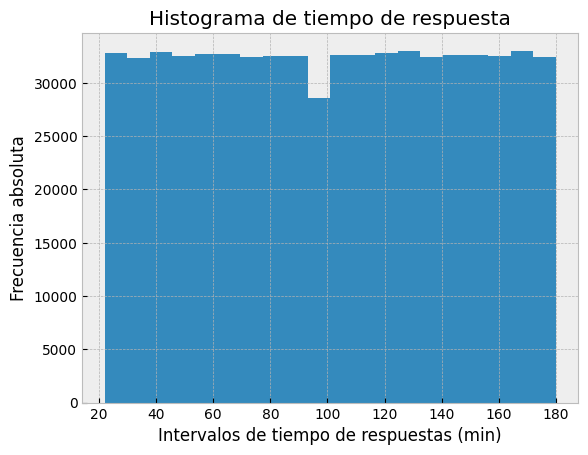

In [36]:
fig, ax = plt.subplots()
ax.hist(df_delitos.t_respuesta, bins=20)
ax.set_title('Histograma de tiempo de respuesta')
ax.set_xlabel('Intervalos de tiempo de respuestas (min)')
ax.set_ylabel('Frecuencia absoluta')

<BarContainer object of 56 artists>

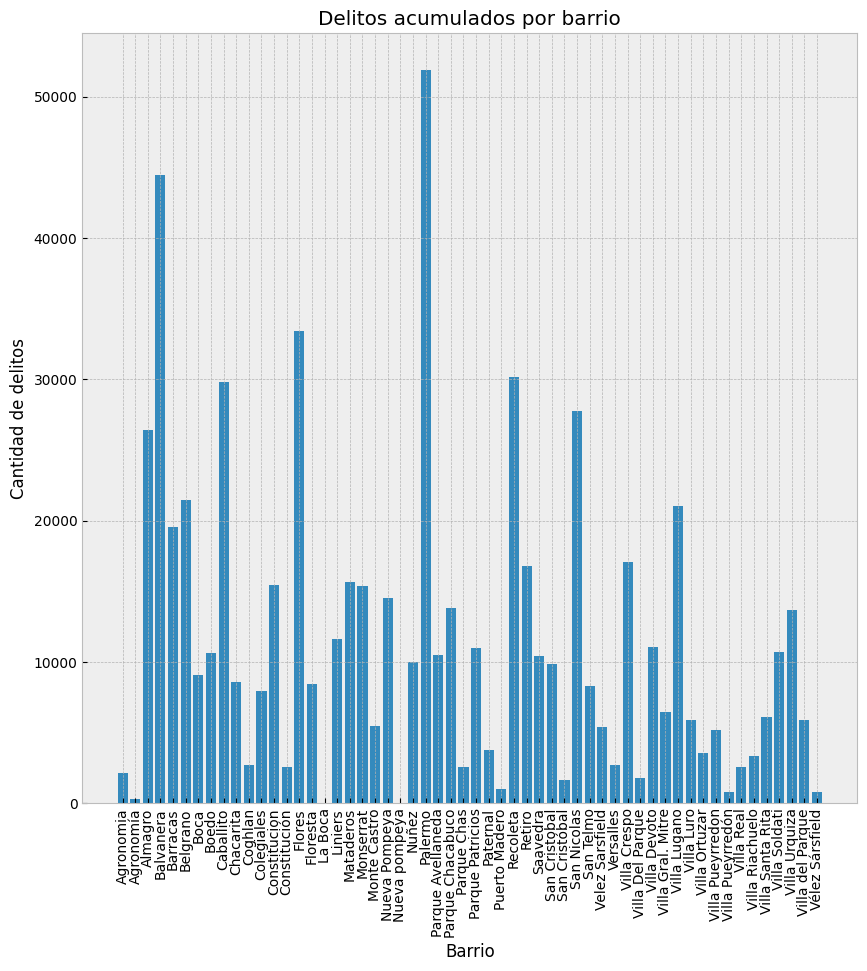

In [37]:
cuenta_barrio = df_delitos.barrio.groupby(df_delitos.barrio).count()
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation = 90)
ax.set_title('Delitos acumulados por barrio')
ax.set_ylabel('Cantidad de delitos')
ax.set_xlabel('Barrio')
ax.bar(cuenta_barrio.index, cuenta_barrio)

([<matplotlib.patches.Wedge at 0x2001029a250>,
 [Text(1.099973839152343, 0.007586381249044061, 'Homicidio'),
  Text(0.4127578478744845, 1.0196229494367142, 'Hurto (sin violencia)'),
  Text(-0.9495103636512853, 0.555364807418335, 'Lesiones'),
  Text(-0.1509843726986097, -1.0895887844507246, 'Robo (con violencia)')])

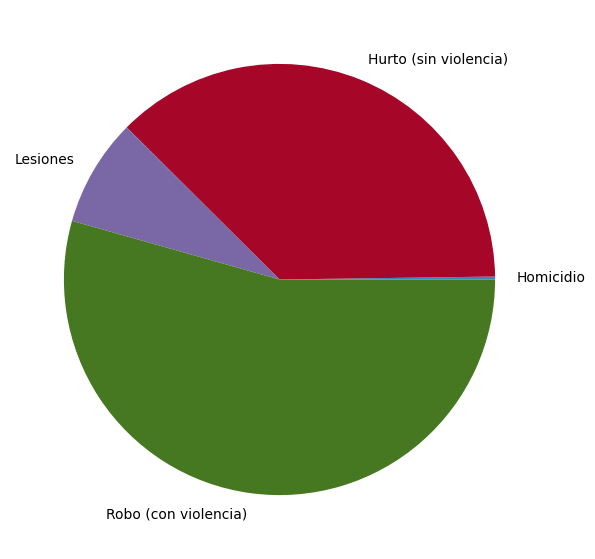

In [38]:
cuentita_b= df_delitos.tipo.groupby(df_delitos.tipo).count()
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(cuentita_b, labels = cuentita_b.index)

<AxesSubplot:>

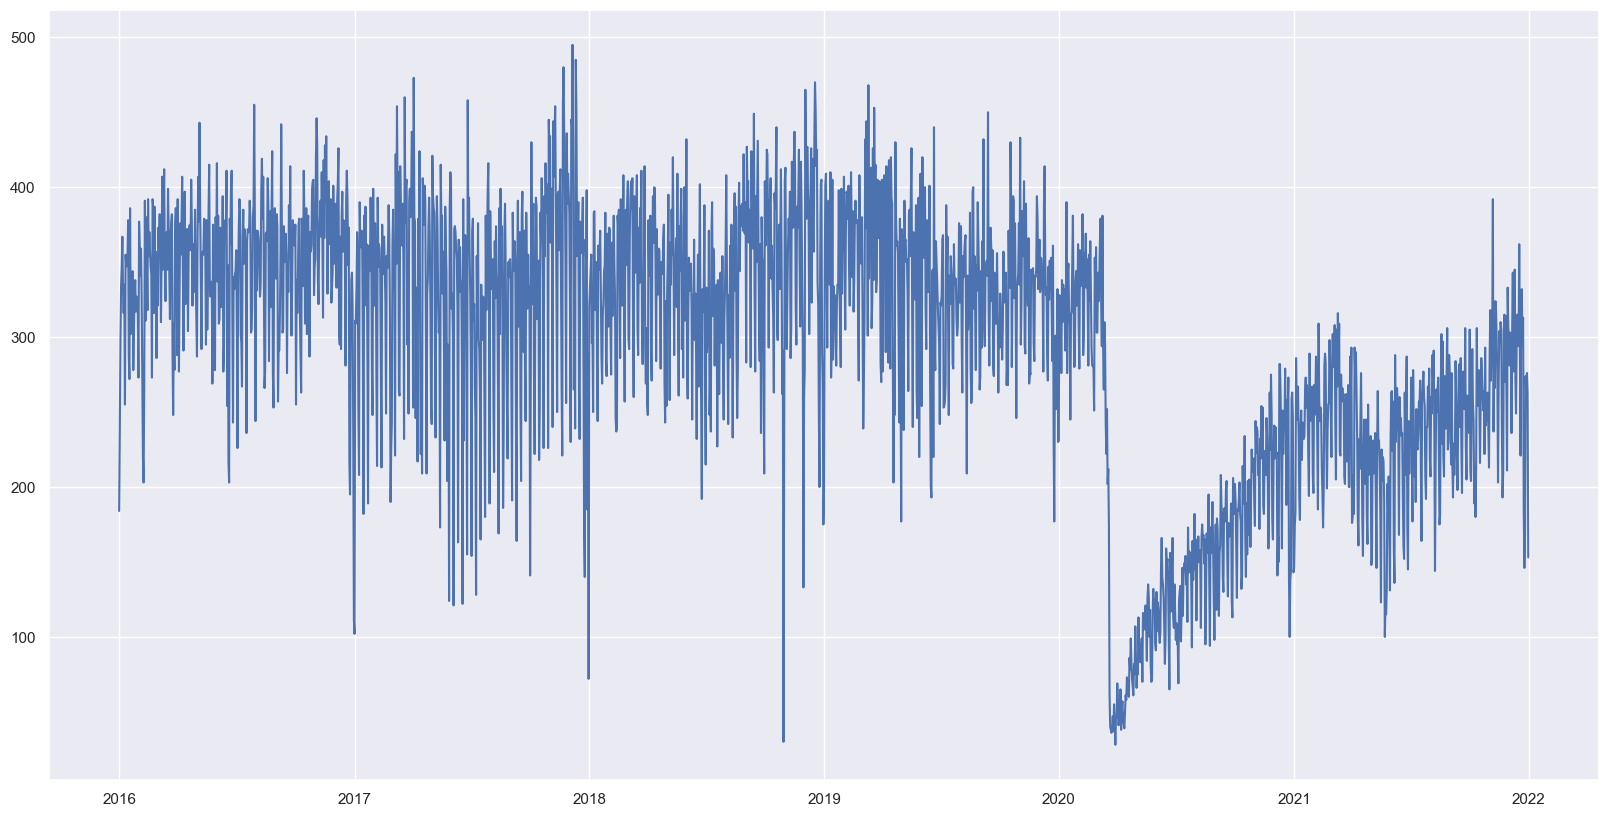

In [40]:
sns.set(rc = {'figure.figsize':(20,10)})
fechas_de_delitos = df_delitos.fecha.groupby(df_delitos.fecha.values).count()
sns.lineplot(data=fechas_de_delitos, x=fechas_de_delitos.index, y=fechas_de_delitos.values) 

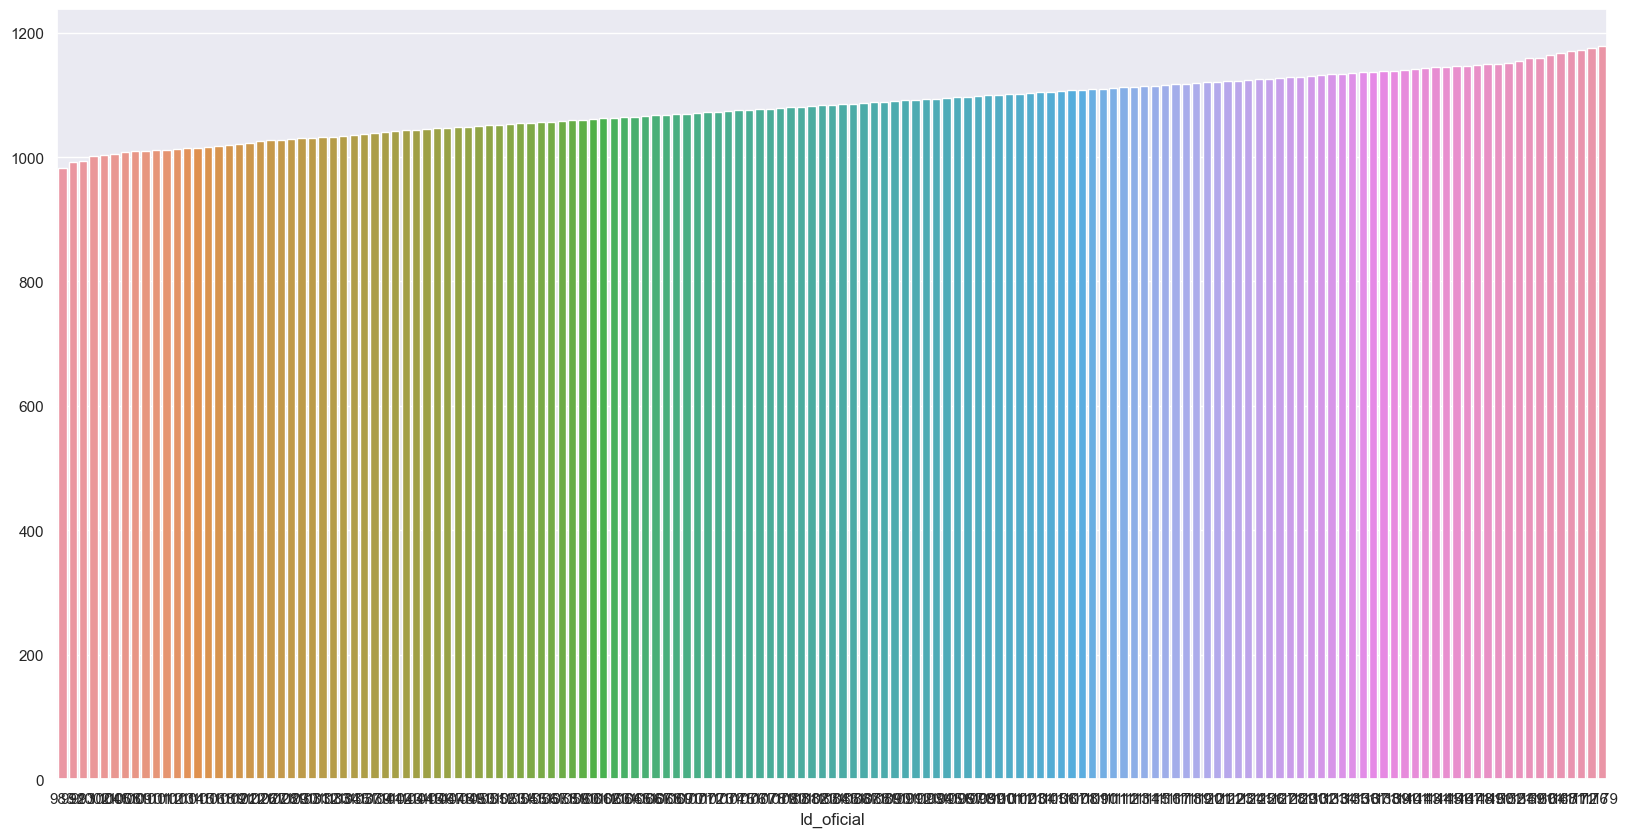

In [41]:
poli = df_delitos.Id_oficial.groupby(df_delitos.Id_oficial).count()
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.barplot(x=poli.index, y=poli.values, data=poli)

<BarContainer object of 24 artists>

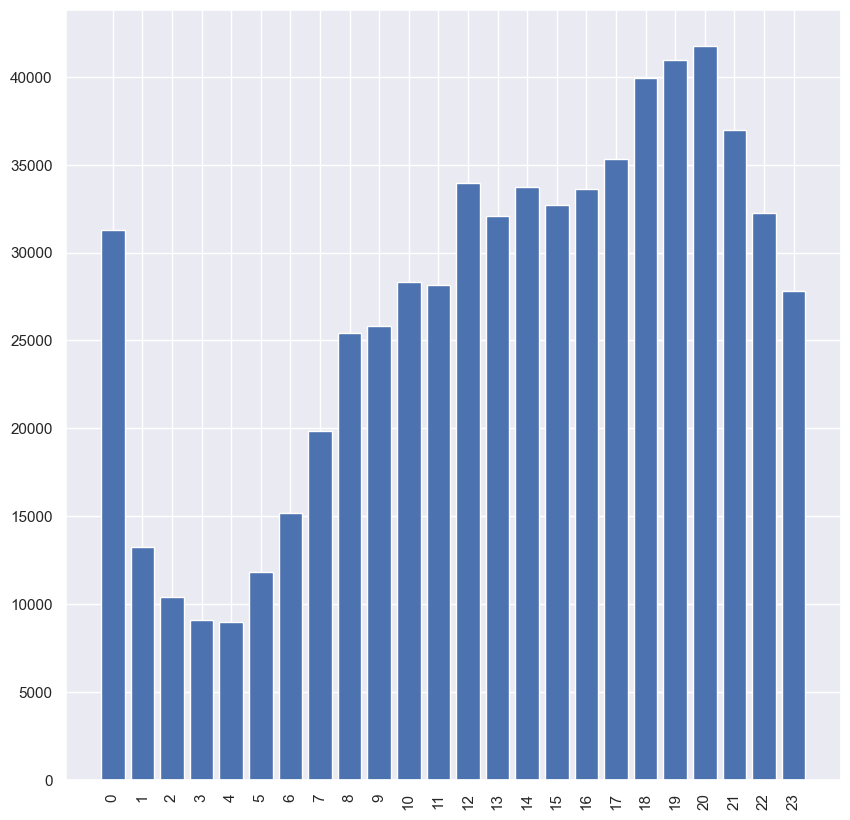

In [45]:
#Hacer una columna de franja horaria pero con valores numéricos (se elimina el valor S/D)
df_delitos['franja_horaria_num']=pd.to_numeric(df_delitos.franja_horaria, errors='coerce')
#Se hace una cuenta para la gráfica de barras
cuenta_franja = df_delitos.franja_horaria_num.groupby(df_delitos.franja_horaria_num).count().sort_index()

#Se crean los objetos de gráficos
fig, ax = plt.subplots(figsize=(10,10))
#Se colocan las marcas del eje x a 90° con todos los valores para las etiquetas
plt.xticks(cuenta_franja.index.astype(int),rotation = 90)
#Se hace la gráfica de barras
ax.bar(cuenta_franja.index.astype(int), cuenta_franja)

## Separación de datos: Prueba y Entrenamiento

In [46]:
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(df_delitos):
    print(len(train_index))
    print(len(test_index))
df_delitos['Train'] = 0
df_delitos.loc[df_delitos.index.isin(train_index),'Train'] = 1

454059
194597


## Método de feature selection

In [48]:
df_delitos['arresto'] = df_delitos.target
X = df_delitos.drop("arresto", 1)       # feature matrix
y = df_delitos['arresto']               # target feature
df_delitos.head()

AttributeError: 'DataFrame' object has no attribute 'target'

In [49]:
forward_selection(X,y)

NameError: name 'forward_selection' is not defined

## Algoritmo de  clasificación

In [50]:
prueba=df_delitos[df_delitos['Train']==1]
prueba.head()

id_delito      fecha  franja_horaria                   tipo  \
0  DEL1000086952 2016-01-01              13   Robo (con violencia)   
1  DEL1000086953 2016-01-01              22   Robo (con violencia)   
2  DEL1000086954 2016-01-01               1               Lesiones   
3  DEL1000086955 2016-01-01              19  Hurto (sin violencia)   
4  DEL1000086956 2016-01-01               4   Robo (con violencia)   

          subtipo uso_armas  t_respuesta arresto Id_arresto Id_oficial  \
0             NaN       NaN           84      no        NaN    1100114   
1             NaN       NaN          135      no        NaN    1100305   
2  Siniestro Vial       NaN          143      no        NaN    1100089   
3             NaN       NaN           29      no        NaN    1100058   
4  Robo Automotor       NaN          163      no        NaN    1100546   

              barrio comuna    latitud   longitud  victimas  \
0  Parque Avellaneda    9.0  -34.64873 -58.468536       NaN   
1            Palermo   14.0 -34.576925   -58.4074       NaN   
2   Parque Patricios    4.0 -34.645197 -58.401099       NaN   
3  Parque Avellaneda    9.0  -34.65576 -58.478681       NaN   
4          Caballito    6.0 -34.624128 -58.436826       NaN   

   franja_horaria_num  Train  
0                  13      1  
1                  22      1  
2                   1      1  
3                  19      1  
4                   4      1

In [51]:
ccc = 0
prueba['uso_armas'].fillna(ccc, inplace = True)
prueba['uso_armas']=prueba.uso_armas.replace({'Arma cortante':1, 'Arma de fuego':2})
prueba['arresto'] = prueba.arresto.replace({'no':1, 'si':2})
prueba['tipo'] = prueba.tipo.replace({'Lesiones':1,'Lesiones':2,'Hurto (sin violencia)':3,'Robo (con violencia)':4, 'Homicidio':5})


C:\Users\User\AppData\Local\Temp\ipykernel_26336\3784591417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['uso_armas'].fillna(ccc, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_26336\3784591417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['uso_armas']=prueba.uso_armas.replace({'Arma cortante':1, 'Arma de fuego':2})
C:\Users\User\AppData\Local\Temp\ipykernel_26336\3784591417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [52]:
pruebita = prueba[['franja_horaria','t_respuesta', 'arresto']]
pruebita

franja_horaria  t_respuesta  arresto
0                   13           84        1
1                   22          135        1
2                    1          143        1
3                   19           29        1
4                    4          163        1
...                ...          ...      ...
648648              20          152        2
648649              18           69        1
648651              19           92        1
648653              12          157        2
648655              10           99        1

[454059 rows x 3 columns]

C:\Users\User\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


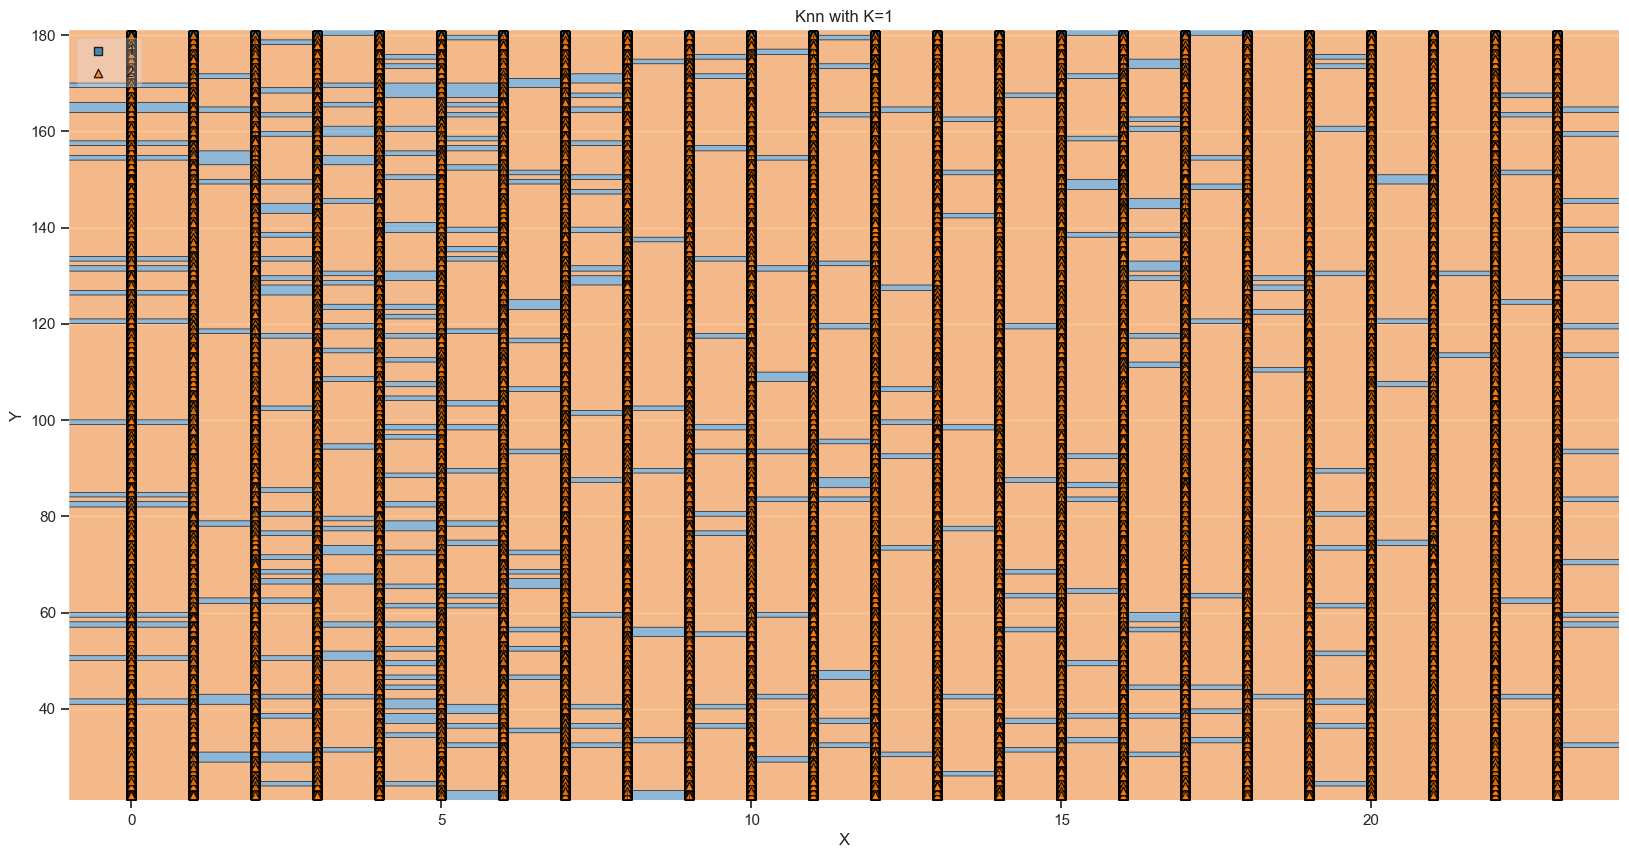

C:\Users\User\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


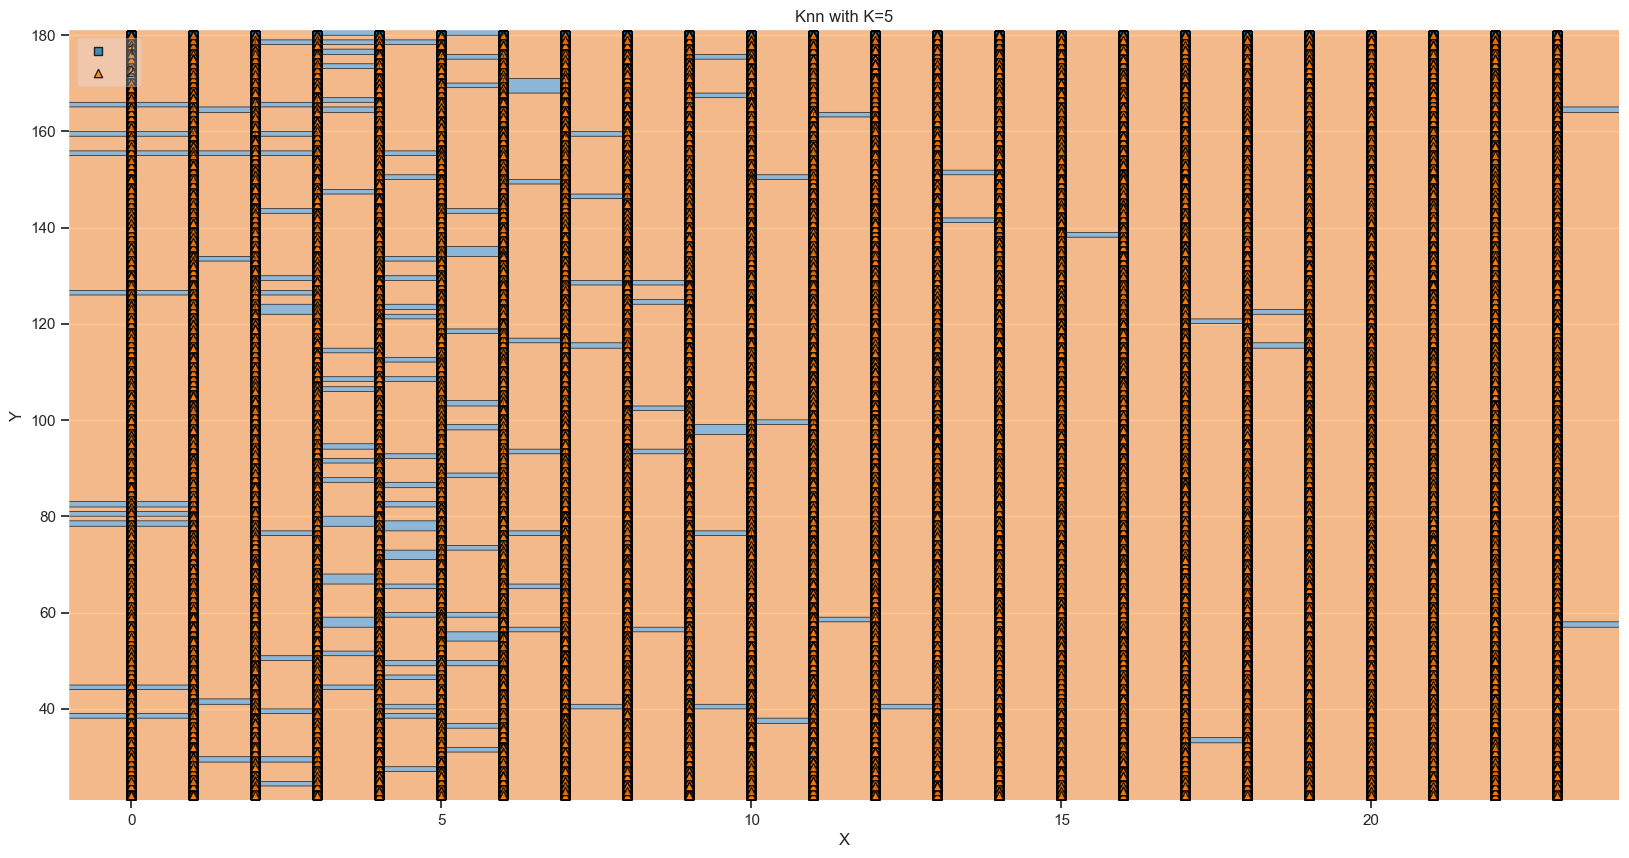

C:\Users\User\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


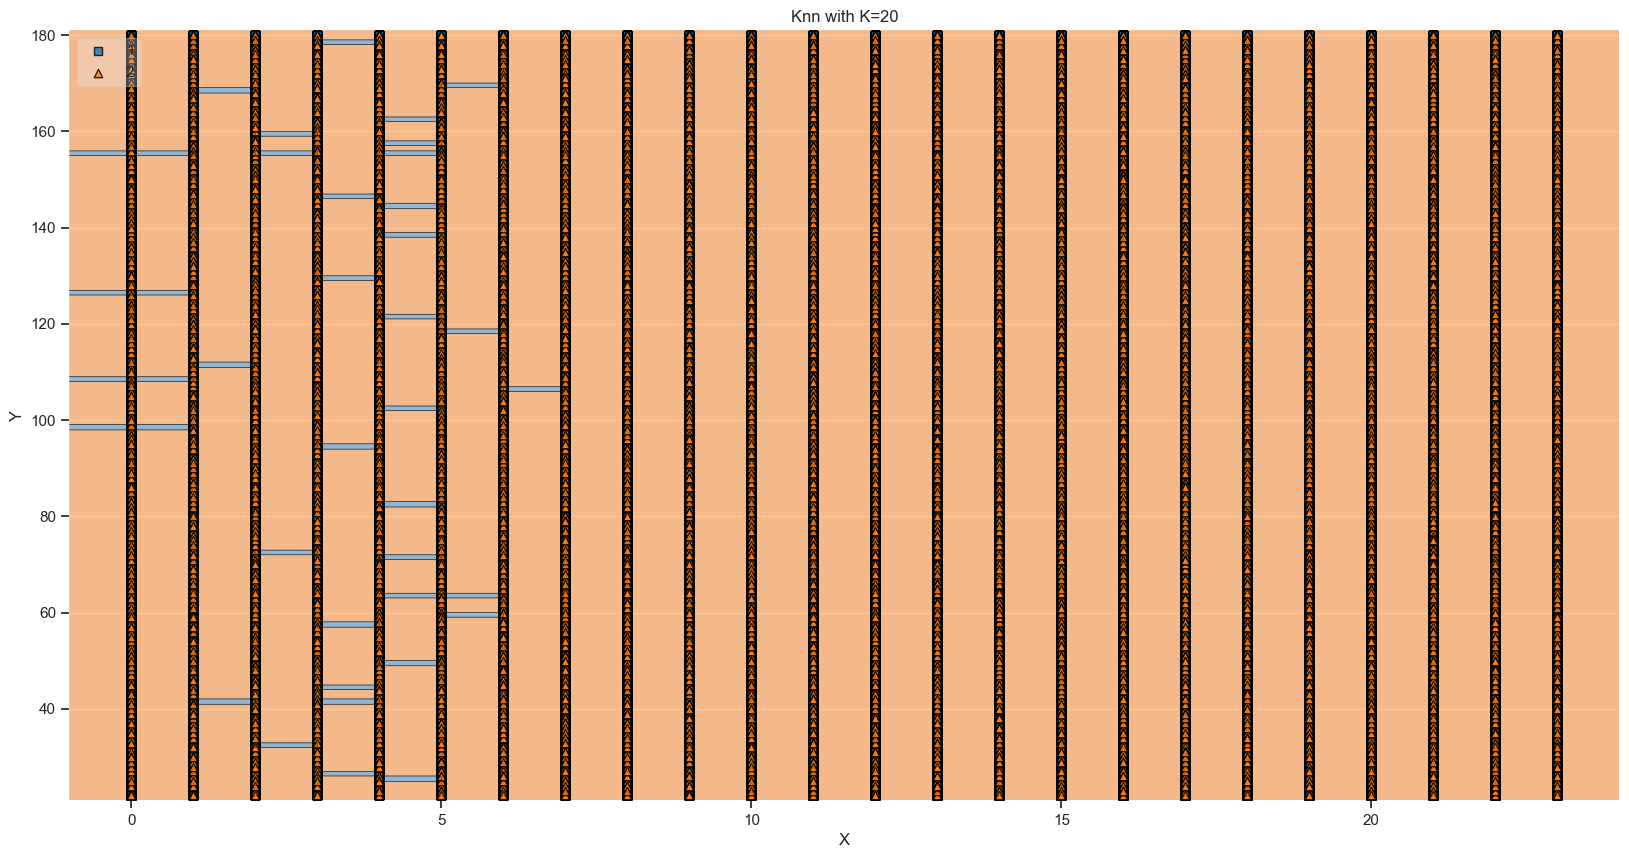

In [53]:
def knn_comparison(data, k): # funcion de comparacion
    x = data[['franja_horaria','t_respuesta']].values # Extraccion de columns
    y = data['arresto'].astype(int).values # Clase y como int
    clf = neighbors.KNeighborsClassifier(n_neighbors=k) #algoritmo
    clf.fit(x, y)
    # Graficar la region de decision
    plot_decision_regions(x, y, clf=clf, legend=2)# Añadir anotaciones
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()
# Cargar y aplicar funcion
for i in [1,5,20]: # Para diferentes valores de k (Knn)
   knn_comparison(pruebita, i)

### Metricas de validación

### Conclusiones